In [1]:
%load_ext autoreload
%autoreload
from IPython.core.debugger import Tracer

from keras.layers import Input, Add, Conv2D
import numpy as np
from keras.models import Model
from keras.optimizers import Adam
from fabrics import UpSample, DownSample, SameRes, Fabric, Node
from keras import backend as K
from keras.utils import plot_model

from helpers import plot_model_history
from IPython.display import clear_output
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
K.set_image_data_format('channels_last')  # TF dimension ordering in this code


x = np.load('data/parts_train.npy')
y = np.load('data/parts_train_labels.npy')

x_val = np.load('data/parts_validation.npy')
y_val = np.load('data/parts_validation_labels.npy')

name = 'start'

fabric = Fabric(x.shape[1:], (2, 9), 4, channels_double=True)


print("Plotting model")
plot_model(fabric.model, to_file='small_2x9.png')
print("-"*30)


Plotting model
------------------------------


In [3]:
print('-'*30)
print('Fitting model...')
print('-'*30)
history = fabric.model.fit(x, 
                           y, 
                           validation_data=(x_val, y_val), 
                           batch_size=100, 
                           epochs=60, 
                           verbose=1, 
                           shuffle=True)
  

------------------------------
Fitting model...
------------------------------
Train on 1500 samples, validate on 500 samples
Epoch 1/60
1500/1500 [==============================] - 29s - loss: 1.2669 - acc: 0.4939 - val_loss: 1.1281 - val_acc: 0.4372
Epoch 2/60
1500/1500 [==============================] - 25s - loss: 1.2646 - acc: 0.4947 - val_loss: 1.1165 - val_acc: 0.4883
Epoch 3/60
1500/1500 [==============================] - 25s - loss: 1.2622 - acc: 0.4957 - val_loss: 1.1073 - val_acc: 0.5027
Epoch 4/60
1500/1500 [==============================] - 25s - loss: 1.2599 - acc: 0.4965 - val_loss: 1.1003 - val_acc: 0.5093
Epoch 5/60
1500/1500 [==============================] - 25s - loss: 1.2577 - acc: 0.4975 - val_loss: 1.0949 - val_acc: 0.5148
Epoch 6/60
1500/1500 [==============================] - 24s - loss: 1.2555 - acc: 0.4982 - val_loss: 1.0911 - val_acc: 0.5200
Epoch 7/60
1500/1500 [==============================] - 25s - loss: 1.2536 - acc: 0.4992 - val_loss: 1.0884 - val_acc:

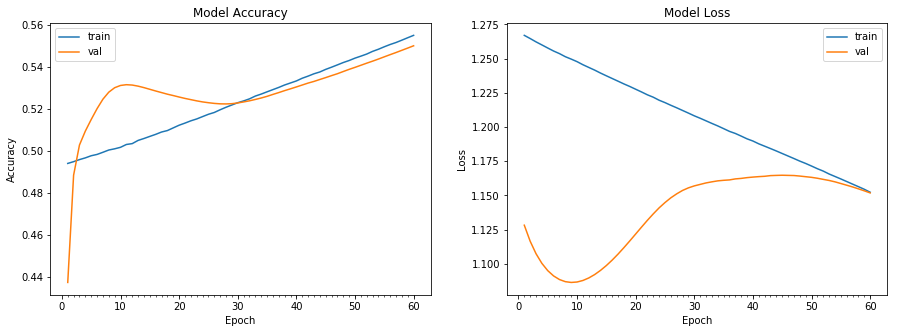

In [4]:
plot_model_history(history)

In [5]:
fabric.model.save('trained_models/small_2x9_doubling_channels.h5')